<a href="https://colab.research.google.com/github/garden-jun/DeepLearning-from-scratch/blob/main/3%EC%9E%A5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D/3.4%203%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.4.1 표기법 설명**

가중치 표기에 대한 설명이며, 이번 장에서는 0층,1층,2층,3층 총 4개의 층만을 사용할 예정이다.

W12(1) 
* 12 는 뒷층의 1번째 뉴런, 앞층의 2번째 뉴런이라는 의미이다.
* (1) 은 1층의 가중치라는 의미이다.




## **3.4.2 각 층의 신호 전달 구현하기**
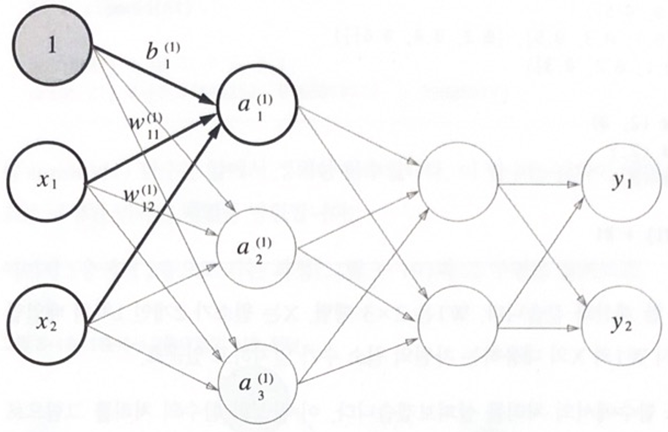  
  
편향 b가 추가된 모습입니다. 편향 b는 출발 인덱스가 없으므로 도착인덱스만 필요로 합니다.

그림에서 a1(1)을 수식으로 나타내어 봅시다.

    a1(1) = w11(1)*x1 + w12(1)*x2 + b1(1)

여기에서 행렬의 내적을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화 시킬 수 있습니다.

    A(1) = XW(1) + B(1)
    
    A(1) = (a1(1)  a2(1)  a3(1))
    X = (x1  x2)
    B(1) = (b1(1)  b2(1)  b3(1))

    W(1) = (w11(1)  w21(1)  w31(1)
            w12(1)  w22(1)  w32(1))

위 식을 코드로 구현하면 다음과 같습니다.

In [ ]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape)  # (2, )
print(B1.shape) # (3, )

A1 = np.dot(X, W1) + B1
print(A1)


(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


이제까지 설명한 A는 가중치의 합이었습니다.  
가중치의 총합을 a, 활성화 함수 h()로 변환된 신호를 z로 표기하겠습니다.



In [ ]:
# 시그모이드 함수 구현
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
Z1 = sigmoid(A1)

print(A1) # 가중치 합      # [0.3, 0.7, 1.1]  
print(Z1) # 활성화 함수를 통해 변환된 값

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]



이어서 1층에서 2층으로 가는 과정을 구현해 보겠습니다.

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2, )

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


마지막으로 2층에서 출력층으로의 신호전달입니다.  
출력층의 구현도 위의 구현과 같지만, 활성화함수만 지금까지의 은닉층과 다릅니다.

In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)
Y = identity_function(A3) # 혹은 Y = A3
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


여기서는 항등 함수인 identity_function()을 정의하고, 이를 출력층의 활성화 함수로 이용했습니다.  

## **3.4.3 구현정리**

지금까지의 구현을 정리  
가중치면 W1과 같이 대문자로 쓰고, 그 외 편향과 중간 결과 등은 모두 소문자로 썼습니다.

In [11]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


이로써 신경망의 순방향 구현은 끝입니다. 보신 것처럼 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있습니다!